#### In this task, we need to focus the light intensity along the main diagonal of the matrix using random variations of the input matrix, 𝐸𝑖𝑛 .$$ I_{\text{o}} = \left| T \times E_{\text{in}} \right|^2 $$ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def generate_matrix(size):
    return np.random.choice([-1, 1], size=(size, size))

In [3]:
def generate_complex_gaussian(rows, cols, scale, random_state=np.random):
    return 1j * random_state.normal(loc=0.0, scale=scale / cols, size=(rows, cols)) + \
           random_state.normal(loc=0.0, scale=scale / cols, size=(rows, cols))

In [4]:
size = 64
iters = 250000
E_in = generate_matrix(size)
T = generate_complex_gaussian(size, size, 1)
mean_intensity_ratios = []
diagonal_intensity_sum = []


for _ in tqdm(range(iters)):
    I_out = np.abs(T @ E_in) ** 2
    diagonal_sum = np.trace(I_out)
    background_sum = np.sum(I_out) - diagonal_sum
    mean_diagonal = diagonal_sum / size
    mean_background = background_sum / (size**2 - size)

    diagonal_intensity_sum.append(diagonal_sum)
    mean_intensity_ratios.append(mean_diagonal / mean_background)

    E_in_new = E_in.copy()
    rand_index = np.random.randint(E_in_new.size)
    E_in_new.flat[rand_index] *= -1

    I_out_new = np.abs(T @ E_in_new) ** 2
    if np.trace(I_out_new) > diagonal_sum:
        E_in = E_in_new

I_out = np.abs(T @ E_in) ** 2

100%|██████████| 250000/250000 [02:31<00:00, 1652.08it/s]


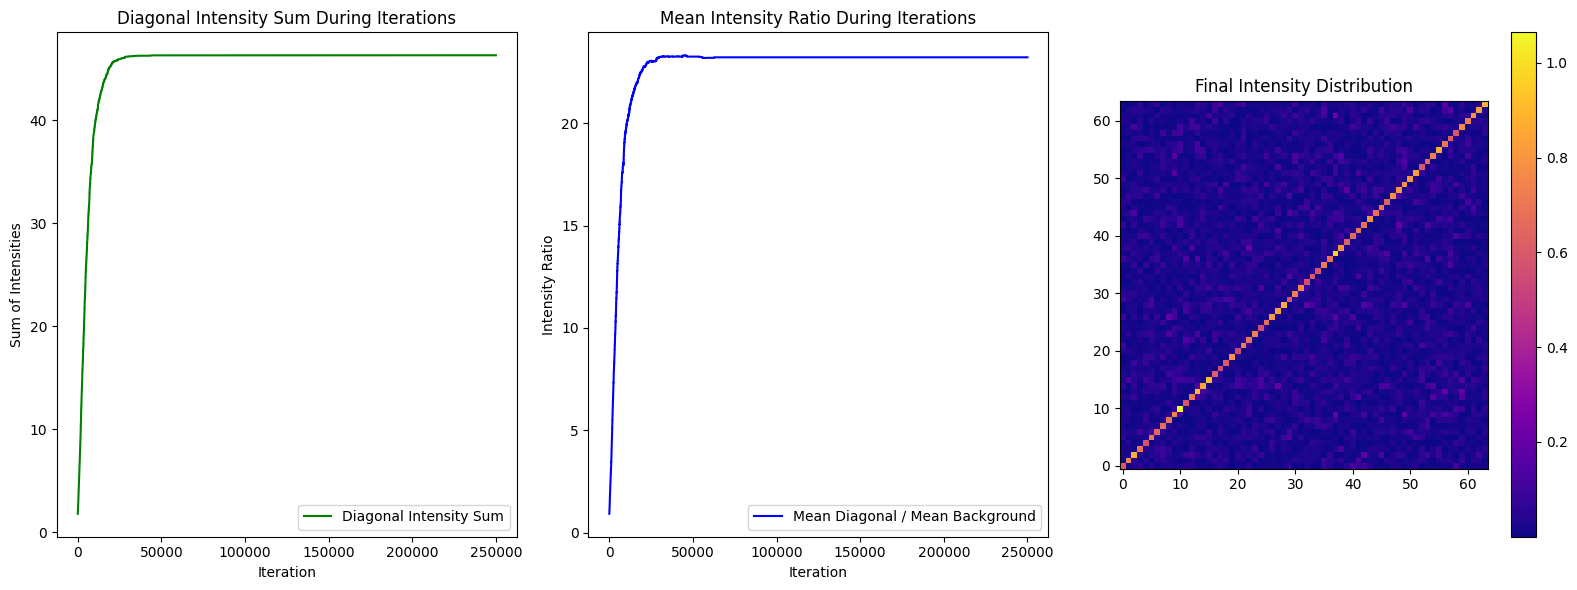

In [5]:
#Plots
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
plt.plot(diagonal_intensity_sum, color='green', label="Diagonal Intensity Sum")
plt.title("Diagonal Intensity Sum During Iterations")
plt.xlabel("Iteration")
plt.ylabel("Sum of Intensities")
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(mean_intensity_ratios, color='blue', label="Mean Diagonal / Mean Background")
plt.title("Mean Intensity Ratio During Iterations")
plt.xlabel("Iteration")
plt.ylabel("Intensity Ratio")
plt.legend()

plt.subplot(1, 3, 3)
c = plt.imshow(I_out, interpolation='nearest', cmap='plasma')
plt.title("Final Intensity Distribution")
plt.colorbar(c)
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()